# **Lab: Sentiment Analysis**

This tutorial demonstrates text classfication for sentiment analysis. The provided dataset is written in thai language which was retrived from Mr.Wannaphong Phatthiyaphaibun @ https://github.com/PyThaiNLP/lexicon-thai/tree/master/ข้อความ. The code was adopted from Mr.Tachasit Chueprasert.


## **Step 1: Import Libraries**


All the necessary libraries are listed below.

In [2]:
import numpy as np                              # creates an array object
import collections                              # give you a default value when calling a non exist key
from itertools import chain                     # concatenate an iterable object
from pythainlp.tokenize import word_tokenize    # split a sentence into words

from sklearn.model_selection import KFold             # k-fold cross validation
from sklearn.model_selection import train_test_split  # hold-out validation

from nltk import FreqDist, precision, recall, f_measure, NaiveBayesClassifier   # build and measure a model
from nltk.classify import util                  # use a model

## **Step 2: Import the Dataset**

Connect to the dataset using `google.colab.drive.mount()`

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Here, ensure that your destination paths are correct.

In [3]:
pos_path = 'pos.txt'
neg_path = 'neg.txt'

## **Step 3: Prepare the Dataset**

Read files in the provided paths line by line then remove all spaces at the start and end of a string using` .strip()` function. After that, we label the sentences with positive or negative.


In [4]:
# read files in the provided paths then remove all spaces at the start and end of a string
# and label each word according to the folder afterwards
raw_data_pos = [[line.strip(), 'pos'] for line in open(pos_path, 'r')]
raw_data_neg = [[line.strip(), 'neg'] for line in open(neg_path, 'r')]

# merge positive and negative dataset into a single dataset
dataset = raw_data_pos + raw_data_neg

print(dataset)

[['ดี', 'pos'], ['ขอบคุณ', 'pos'], ['สู้เสมอ', 'pos'], ['ผ่าน', 'pos'], ['โคตรสนุก', 'pos'], ['สุดยอด', 'pos'], ['น่ารัก', 'pos'], ['ขอบคุณทุก', 'pos'], ['คงคิดถึง', 'pos'], ['เก็บเวลาที่ดีให้เราได้จดจำ', 'pos'], ['ทำข้อสอบให้ได้', 'pos'], ['สู้', 'pos'], ['รอยยิ้มในความทรงจำ', 'pos'], ['ทุกนี้ฉันคิดถึง', 'pos'], ['ความทรงจำที่ดีเหลือเกิน', 'pos'], ['รักมาก คิดถึงมาก', 'pos'], ['ดีใจ', 'pos'], ['รัก', 'pos'], ['ห่วง', 'pos'], ['รักแฟนขี้บ่นจัง', 'pos'], ['ขอบคุณผู้ใจดี', 'pos'], ['มิตรภาพดี', 'pos'], ['ที่รัก', 'pos'], ['ชอบจัง', 'pos'], ['ความทรงจำที่ยังสวยงาม', 'pos'], ['ช่วงเวลาที่รู้จักถึงจะไม่นานแต่คือช่วงที่ดีที่สุด', 'pos'], ['เปลี่ยนไปรัก รักจนหมดหัวใจ', 'pos'], ['ดีใจด้วย', 'pos'], ['ปลอดภัย', 'pos'], ['ทรงพระเจริญ', 'pos'], ['ใจเย็น', 'pos'], ['ดูแลตัวเองด้วย', 'pos'], ['ขอบคุณมิตรภาพดี เพื่อนที่ดี', 'pos'], ['โอกาศดี แบบนี้ห้ามพลาด', 'pos'], ['ขอบคุณ', 'pos'], ['ง่าย', 'pos'], ['มองโลกในแง่ดี', 'pos'], ['ไม่ต้องกลัว', 'pos'], ['คุณโชคดีกว่าหลายมาก', 'pos'], ['อดทนต่อไป', 'po

## **Step 4: Build a Model**

There are two ways of training and validating a model.First, we called it  "hold-out validation" (aka. train-test split validation). Second, "k-fold cross validation".

### Option 1 : Training a model with Train-Test Split (70:30)

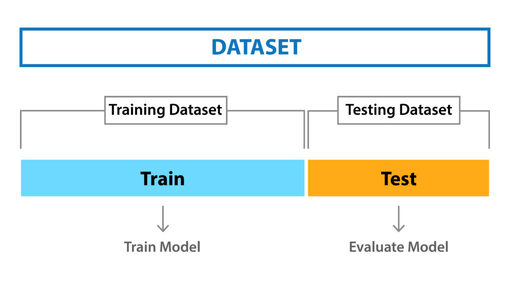

In [5]:
value_set = []
label_set = []

def split_value_label(dataset):
    for value, label in dataset:
        value_set.append(value)
        label_set.append(label)

def merge_value_label(value, label):
    temp_merge = []
    for i in range(len(value)):
        temp_tuple = (value[i], label[i])
        temp_merge.append(temp_tuple)
    # for i in range(len(X_test)):
    # temp_list = list()
    # temp_list.append(X_test[i])
    # temp_list.append(y_test[i])
    # temp_tuple = (X_test[i], y_test[i])
    # test_set_30.append(temp_tuple) # temp_list
    # print(X_test[i], ' | ', y_test[i])
    return temp_merge

# split the data from the label
split_value_label(dataset)

# split train-test
X_train, X_test, y_train, y_test = train_test_split(value_set, label_set, test_size=0.30, random_state=99)

# merge it again as we need to further process it
test_set = merge_value_label(X_test, y_test)
train_set = merge_value_label(X_train, y_train)

# extract words from the sentences using word_tokenize() function
vocabulary = set(chain(*[word_tokenize(i[0].lower()) for i in train_set]))
feature_train_set = [({i:(i in word_tokenize(sentence.lower())) for i in vocabulary},tag) for sentence, tag in train_set]
feature_test_set = [({i:(i in word_tokenize(sentence.lower())) for i in vocabulary},tag) for sentence, tag in test_set]
classifier = NaiveBayesClassifier.train(feature_train_set)

# validating part
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
for i, (feats, label) in enumerate(feature_test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)
    accuracy_score = util.accuracy(classifier, feature_test_set)
print('No. of Training Data: {}'.format(len(train_set)))
print('No. of Testing Data: {}'.format(len(test_set)))
print('=================== Results ===================')
print('Accuracy {:f}'.format(accuracy_score))
print('            Positive     Negative')
print('F1         [{:f}     {:f}]'.format(
        f_measure(refsets['pos'], testsets['pos']),
        f_measure(refsets['neg'], testsets['neg'])
))
print('Precision  [{:f}     {:f}]'.format(
        precision(refsets['pos'], testsets['pos']),
        precision(refsets['neg'], testsets['neg'])
))
print('Recall     [{:f}     {:f}]'.format(
        recall(refsets['pos'], testsets['pos']),
        recall(refsets['neg'], testsets['neg'])
))
print('===============================================\n')

KeyboardInterrupt: 

### Option 2: Build a Model with 10-Fold Cross Validation

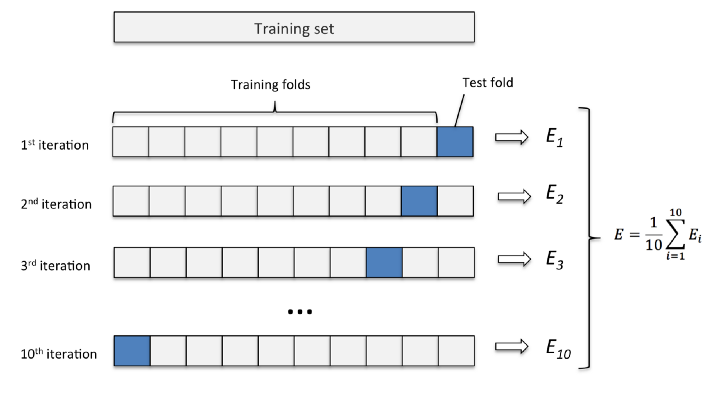

In [ ]:
# set up a k-fold cross validation
data_k_fold = KFold(n_splits=10, random_state=99, shuffle=True)

# start training a model
for k, (train_set, test_set) in enumerate(data_k_fold.split(dataset)):
    dataset = np.array(dataset)
    train_set = dataset[train_set]
    test_set = dataset[test_set]
    vocabulary = set(chain(*[word_tokenize(i[0]) for i in train_set]))
    feature_train_set = [({i:(i in word_tokenize(sentence)) for i in vocabulary},tag) for sentence, tag in train_set]
    feature_test_set = [({i:(i in word_tokenize(sentence)) for i in vocabulary},tag) for sentence, tag in test_set]
    classifier = NaiveBayesClassifier.train(feature_train_set)
    refsets = collections.defaultdict(set)
    testsets = collections.defaultdict(set)
    for i, (feats, label) in enumerate(feature_test_set):
        refsets[label].add(i)
        observed = classifier.classify(feats)
        testsets[observed].add(i)
    accuracy_score = util.accuracy(classifier, feature_test_set)
    print('Fold {}'.format(k + 1))
    print('=================== Results ===================')
    print('Accuracy {:f}'.format(accuracy_score))
    print('            Positive     Negative')
    print('F1         [{:f}     {:f}]'.format(
        f_measure(refsets['pos'], testsets['pos']),
        f_measure(refsets['neg'], testsets['neg'])
    ))
    print('Precision  [{:f}     {:f}]'.format(
        precision(refsets['pos'], testsets['pos']),
        precision(refsets['neg'], testsets['neg'])
    ))
    print('Recall     [{:f}     {:f}]'.format(
        recall(refsets['pos'], testsets['pos']),
        recall(refsets['neg'], testsets['neg'])
    ))
    print('===============================================\n')

Fold 1
=================== Results ===================
Accuracy 0.841121
            Positive     Negative
F1         [0.790123     0.872180]
Precision  [0.864865     0.828571]
Recall     [0.727273     0.920635]

Fold 2
=================== Results ===================
Accuracy 0.766355
            Positive     Negative
F1         [0.675325     0.817518]
Precision  [0.866667     0.727273]
Recall     [0.553191     0.933333]

Fold 3
=================== Results ===================
Accuracy 0.803738
            Positive     Negative
F1         [0.740741     0.842105]
Precision  [0.833333     0.788732]
Recall     [0.666667     0.903226]

Fold 4
=================== Results ===================
Accuracy 0.783019
            Positive     Negative
F1         [0.610169     0.849673]
Precision  [0.782609     0.783133]
Recall     [0.500000     0.928571]

Fold 5
=================== Results ===================
Accuracy 0.669811
            Positive     Negative
F1         [0.533333     0.744526]
Precis

## **Step 5: Use the Model**

Type anything in thai language to see if it works. Type . if you would like to stop.

In [ ]:
while True:
	test_sentence = input('\nTest Sentence: ')
	if test_sentence == '.':
		break
	else:
		featurized_test_sentence =  {i:(i in word_tokenize(test_sentence)) for i in vocabulary}
		print("Tag:",classifier.classify(featurized_test_sentence))


Test Sentence: ปวดหัว
Tag: neg

Test Sentence: ตัวร้อน
Tag: neg

Test Sentence: อร่อย
Tag: pos

Test Sentence: อร่อยเหี้ยๆ
Tag: neg

Test Sentence: อร่อยมาก
Tag: pos

Test Sentence: สวยจังเลย
Tag: pos

Test Sentence: สวยตายละมึง
Tag: neg

Test Sentence: สวยตายละ
Tag: neg

Test Sentence: สวยจริง
Tag: pos


# **Additioal Images**

Example of BoW (Bag of Words)



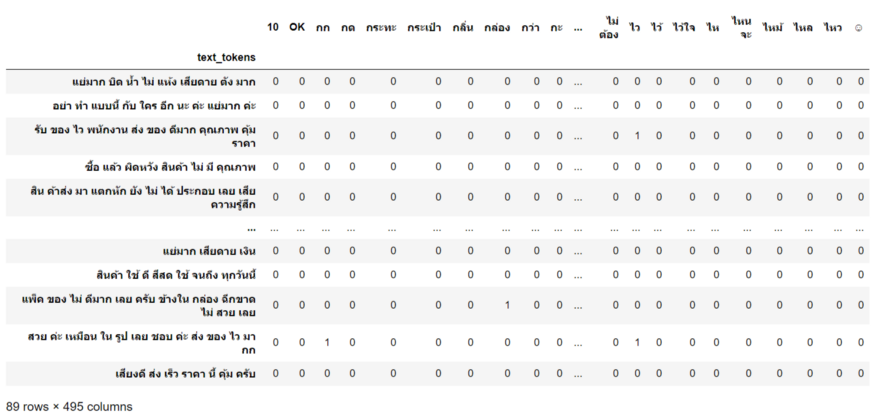